In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
mnist = tf.keras.datasets.mnist

In [12]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [13]:
# normalizing
x_train, x_test = x_train/255.0 , x_test/255.0

In [16]:
# one-hot encoding

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [17]:
# display dataset info

print("x_train length: ",len(x_train),"\nx_test length: ", len(x_test))
print("x_train shape: ",x_train.shape, "\ny_train shape", y_train.shape)
print("min val in x_train: ",np.min(x_train), "\nmax val in x_train",np.max(x_train))


x_train length:  60000 
x_test length:  10000
x_train shape:  (60000, 28, 28) 
y_train shape (60000, 10)
min val in x_train:  0.0 
max val in x_train 1.0


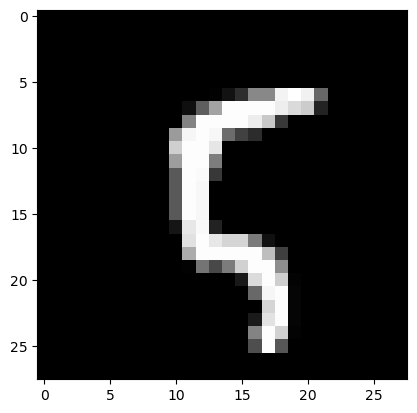

In [18]:
plt.imshow(x_train[100], cmap='gray')

In [21]:
# define the model parameters

n_output = 10

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(n_output, activation='softmax')
])

In [22]:
# compile the model

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
# train the model

n_epochs = 10
batch_size = 100


model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
 59/540 [==>...........................] - ETA: 0s - loss: 2.0613 - accuracy: 0.3156

2024-05-30 16:07:40.656655: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1d5153c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-30 16:07:40.656679: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro P620, Compute Capability 6.1
2024-05-30 16:07:40.663087: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2024-05-30 16:07:40.671781: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:543] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-11.8
  /usr/local/cuda
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_

540/540 [==============================] - 2s 2ms/step - loss: 1.2127 - accuracy: 0.7112 - val_loss: 0.7163 - val_accuracy: 0.8682
Epoch 2/10
540/540 [==============================] - 1s 2ms/step - loss: 0.6849 - accuracy: 0.8436 - val_loss: 0.5275 - val_accuracy: 0.8918
Epoch 3/10
540/540 [==============================] - 1s 2ms/step - loss: 0.5675 - accuracy: 0.8618 - val_loss: 0.4529 - val_accuracy: 0.8985
Epoch 4/10
540/540 [==============================] - 1s 2ms/step - loss: 0.5110 - accuracy: 0.8701 - val_loss: 0.4120 - val_accuracy: 0.9038
Epoch 5/10
540/540 [==============================] - 1s 2ms/step - loss: 0.4764 - accuracy: 0.8767 - val_loss: 0.3859 - val_accuracy: 0.9073
Epoch 6/10
540/540 [==============================] - 1s 2ms/step - loss: 0.4526 - accuracy: 0.8813 - val_loss: 0.3673 - val_accuracy: 0.9102
Epoch 7/10
540/540 [==============================] - 1s 2ms/step - loss: 0.4348 - accuracy: 0.8847 - val_loss: 0.3532 - val_accuracy: 0.9110
Epoch 8/10
540/54

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("test accuracy is: ", test_accuracy)
print("test loss is: ", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3687 - accuracy: 0.9002
test accuracy is:  0.9002000093460083
test loss is:  0.36870989203453064
